In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnan, isnull, lit
from wget import download

In [6]:
spark = SparkSession.builder\
    .master('local[*]')\
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")
sc = spark.sparkContext


22/07/06 14:03:28 WARN Utils: Your hostname, PANZER resolves to a loopback address: 127.0.1.1; using 172.26.9.115 instead (on interface eth0)
22/07/06 14:03:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/07/06 14:03:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
download("https://caelum-online-public.s3.amazonaws.com/2277-spark/01/aula01.zip")

'aula01.zip'

In [8]:
import zipfile
import os

with zipfile.ZipFile('aula01.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
os.remove('aula01.zip')

In [9]:
imoveis = spark.read.json("./aula01/imoveis.json")

In [10]:
imoveis.show(truncate=False)

+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ident                     |listing                                                                                                                                                          |
+--------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{775564-BOJSMVON, Website}|{{Rio de Janeiro, {-22.909429, -43.413557}, Taquara, Zona Oeste}, {0, 0, 0, 1, 0, 62, 0, 0, 62}, {45000, {150, 0}}, {Outros, Residencial}}                       |
|{660895-AUENKNYY, Website}|{{Rio de Janeiro, {-22.869698, -43.509141}, Santíssimo, Zona Oeste}, {1, 2, 0, 1, 0, 0, 0, 0, 44}, {45000, {120, 0}}, {Apartamento, Residencial}}                |
|{751522-JESYFEQL, Website}|{{Rio de Janeiro,

In [11]:
imoveis.count()

73615

Features

In [12]:
imoveis.printSchema()

root
 |-- ident: struct (nullable = true)
 |    |-- customerID: string (nullable = true)
 |    |-- source: string (nullable = true)
 |-- listing: struct (nullable = true)
 |    |-- address: struct (nullable = true)
 |    |    |-- city: string (nullable = true)
 |    |    |-- location: struct (nullable = true)
 |    |    |    |-- lat: double (nullable = true)
 |    |    |    |-- lon: double (nullable = true)
 |    |    |-- neighborhood: string (nullable = true)
 |    |    |-- zone: string (nullable = true)
 |    |-- features: struct (nullable = true)
 |    |    |-- bathrooms: long (nullable = true)
 |    |    |-- bedrooms: long (nullable = true)
 |    |    |-- floors: long (nullable = true)
 |    |    |-- parkingSpaces: long (nullable = true)
 |    |    |-- suites: long (nullable = true)
 |    |    |-- totalAreas: string (nullable = true)
 |    |    |-- unitFloor: long (nullable = true)
 |    |    |-- unitsOnTheFloor: long (nullable = true)
 |    |    |-- usableAreas: string (nullable =

In [13]:
imoveis.select(
    'ident.customerID','listing.*'
).show(3,truncate=False)

+---------------+--------------------------------------------------------------------------+-------------------------------+-----------------+--------------------------+
|customerID     |address                                                                   |features                       |prices           |types                     |
+---------------+--------------------------------------------------------------------------+-------------------------------+-----------------+--------------------------+
|775564-BOJSMVON|{Rio de Janeiro, {-22.909429, -43.413557}, Taquara, Zona Oeste}           |{0, 0, 0, 1, 0, 62, 0, 0, 62}  |{45000, {150, 0}}|{Outros, Residencial}     |
|660895-AUENKNYY|{Rio de Janeiro, {-22.869698, -43.509141}, Santíssimo, Zona Oeste}        |{1, 2, 0, 1, 0, 0, 0, 0, 44}   |{45000, {120, 0}}|{Apartamento, Residencial}|
|751522-JESYFEQL|{Rio de Janeiro, {-22.986927, -43.646786}, Pedra de Guaratiba, Zona Oeste}|{0, 0, 0, 0, 0, 132, 0, 0, 132}|{50000, {100, 0}}|{Outros,

In [14]:
imoveis.select(
    'ident.customerID',
    "listing.types.*",
    "listing.features.*",
    "listing.address.*",
    "listing.prices.price",
    "listing.prices.tax.*"
).show(5,truncate=False)

+---------------+-----------+-----------+---------+--------+------+-------------+------+----------+---------+---------------+-----------+--------------+------------------------+------------------------+----------+-----+-----+----+
|customerID     |unit       |usage      |bathrooms|bedrooms|floors|parkingSpaces|suites|totalAreas|unitFloor|unitsOnTheFloor|usableAreas|city          |location                |neighborhood            |zone      |price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+----------+---------+---------------+-----------+--------------+------------------------+------------------------+----------+-----+-----+----+
|775564-BOJSMVON|Outros     |Residencial|0        |0       |0     |1            |0     |62        |0        |0              |62         |Rio de Janeiro|{-22.909429, -43.413557}|Taquara                 |Zona Oeste|45000|150  |0   |
|660895-AUENKNYY|Apartamento|Residencial|1        |2       |0     |1        

In [15]:
(
imoveis.select(
    'ident.customerID',
    "listing.types.*",
    "listing.features.*",
    "listing.address.*",
    "listing.prices.price",
    "listing.prices.tax.*"
)
.drop('city','location','totalAreas')
.show(5,truncate=False)
)

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+------------------------+----------+-----+-----+----+
|customerID     |unit       |usage      |bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood            |zone      |price|condo|iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+------------------------+----------+-----+-----+----+
|775564-BOJSMVON|Outros     |Residencial|0        |0       |0     |1            |0     |0        |0              |62         |Taquara                 |Zona Oeste|45000|150  |0   |
|660895-AUENKNYY|Apartamento|Residencial|1        |2       |0     |1            |0     |0        |0              |44         |Santíssimo              |Zona Oeste|45000|120  |0   |
|751522-JESYFEQL|Outros     |Residencial|0        |0       |0     |0            |0     |0        |0 

In [16]:
df = (
imoveis.select(
    'ident.customerID',
    "listing.types.*",
    "listing.features.*",
    "listing.address.*",
    "listing.prices.price",
    "listing.prices.tax.*"
)
.drop('city','location','totalAreas')
)

Tratamento

In [17]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: string (nullable = true)
 |-- condo: string (nullable = true)
 |-- iptu: string (nullable = true)



In [18]:
from pyspark.sql.types import IntegerType,DoubleType

In [19]:
(df
    .withColumn('usableAreas',col('usableAreas').cast(IntegerType()))
    .withColumn('price',col('price').cast(DoubleType()))
    .withColumn('condo',col('condo').cast(DoubleType()))
    .withColumn('iptu',col('iptu').cast(DoubleType()))
).printSchema()

root
 |-- customerID: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- usage: string (nullable = true)
 |-- bathrooms: long (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- floors: long (nullable = true)
 |-- parkingSpaces: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- unitFloor: long (nullable = true)
 |-- unitsOnTheFloor: long (nullable = true)
 |-- usableAreas: integer (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- zone: string (nullable = true)
 |-- price: double (nullable = true)
 |-- condo: double (nullable = true)
 |-- iptu: double (nullable = true)



In [20]:
df =(df
    .withColumn('usableAreas',col('usableAreas').cast(IntegerType()))
    .withColumn('price',col('price').cast(DoubleType()))
    .withColumn('condo',col('condo').cast(DoubleType()))
    .withColumn('iptu',col('iptu').cast(DoubleType())))

In [21]:
df.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo|  iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|   0.0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000.0|120.0|   0.0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|  

In [22]:
df.select('usage').groupBy('usage').count().show()

+-----------+-----+
|      usage|count|
+-----------+-----+
|  Comercial| 4019|
|Residencial|69596|
+-----------+-----+



In [23]:
df.where(col('usage')=='Residencial').show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo| iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000.0|120.0|  0.0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|       

In [24]:
df = df.where(col('usage')=='Residencial')

In [25]:
df.select('usage').groupBy('usage').count().show()

+-----------+-----+
|      usage|count|
+-----------+-----+
|Residencial|69596|
+-----------+-----+



In [26]:
df.select('unit').groupBy('unit').count().show()

+-----------+-----+
|       unit|count|
+-----------+-----+
|     Outros| 1190|
|Apartamento|59106|
|       Casa| 9300|
+-----------+-----+



In [27]:
df.select('zone').groupBy('zone').count().show()

+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|14379|
|  Zona Oeste|35523|
|Zona Central| 1002|
|    Zona Sul|18535|
|            |  157|
+------------+-----+



Missing data

In [28]:
df.select([count(when(isnan(c) | isnull(c),True)).alias(c) for c in df.columns]).show()

+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|customerID|unit|usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood|zone|price|condo|iptu|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|         0|   0|    0|        0|       0|     0|            0|     0|        0|              0|          0|           0|   0|    0| 6061|8726|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+



In [29]:
df = df.na.fill(0)

In [30]:
df.select([count(when(isnan(c) | isnull(c),True)).alias(c) for c in df.columns]).show()

+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|customerID|unit|usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|neighborhood|zone|price|condo|iptu|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+
|         0|   0|    0|        0|       0|     0|            0|     0|        0|              0|          0|           0|   0|    0|    0|   0|
+----------+----+-----+---------+--------+------+-------------+------+---------+---------------+-----------+------------+----+-----+-----+----+



In [31]:
df = df.filter(col('zone')!='')

In [32]:
df.select('zone').groupBy('zone').count().show()

+------------+-----+
|        zone|count|
+------------+-----+
|  Zona Norte|14379|
|  Zona Oeste|35523|
|Zona Central| 1002|
|    Zona Sul|18535|
+------------+-----+



Linear Regression

In [33]:
df.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo| iptu|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|
|660895-AUENKNYY|Apartamento|Residencial|        1|       2|     0|            1|     0|        0|              0|         44|          Santíssimo|  Zona Oeste|45000.0|120.0|  0.0|
|751522-JESYFEQL|     Outros|Residencial|        0|       0|     0|            0|     0|       

In [34]:
df.groupBy('customerID').pivot('unit').agg(lit(1)).na.fill(0).show()

+---------------+-----------+----+------+
|     customerID|Apartamento|Casa|Outros|
+---------------+-----------+----+------+
|062130-QKYMWGMV|          1|   0|     0|
|630945-AEEUPRXI|          0|   1|     0|
|994985-OZQNHQKH|          1|   0|     0|
|494674-JWXRZIBM|          1|   0|     0|
|458844-UJCRFSRI|          1|   0|     0|
|155284-BRCDAOIQ|          1|   0|     0|
|396742-DUXBHLRU|          1|   0|     0|
|916072-ZJXARAXO|          1|   0|     0|
|943843-BVTWWHRQ|          1|   0|     0|
|193126-MTNIIFQN|          1|   0|     0|
|319762-UXTTQYFS|          1|   0|     0|
|931151-GZCTKADB|          1|   0|     0|
|103840-OFKPFEZJ|          0|   1|     0|
|176885-NNKZRQGM|          0|   1|     0|
|926638-PBYRAZYR|          1|   0|     0|
|744421-IZJWISWB|          1|   0|     0|
|530012-TYGLQMER|          1|   0|     0|
|209407-GTEUOVKR|          1|   0|     0|
|289667-ZPHGFHJH|          1|   0|     0|
|859388-EYTPMKER|          1|   0|     0|
+---------------+-----------+----+

In [35]:
unit = df.groupBy('customerID').pivot('unit').agg(lit(1)).na.fill(0)

In [36]:
df.groupBy('customerID').pivot('zone').agg(lit(1)).na.fill(0).show()

+---------------+------------+----------+----------+--------+
|     customerID|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+---------------+------------+----------+----------+--------+
|336149-TMGGYSKN|           0|         0|         1|       0|
|846345-JYHIIHQM|           0|         1|         0|       0|
|598128-VUMFFGPB|           0|         0|         0|       1|
|368553-OPCVLPHJ|           0|         1|         0|       0|
|549743-AXHKZBFK|           0|         0|         1|       0|
|812359-OJYBIPJI|           0|         0|         0|       1|
|660235-HZGMOQSM|           0|         0|         1|       0|
|060113-BUDVVMLJ|           0|         0|         1|       0|
|414450-LWZHERNQ|           0|         0|         1|       0|
|002985-MNHDTPVG|           0|         0|         1|       0|
|849580-WTTBUJKK|           0|         1|         0|       0|
|869294-GMGUYRPI|           0|         0|         1|       0|
|744421-IZJWISWB|           0|         0|         1|       0|
|046476-

In [37]:
zone = df.groupBy('customerID').pivot('zone').agg(lit(1)).na.fill(0)

In [38]:
df = (df
.join(unit,'customerID',how='inner')
.join(zone,'customerID',how='inner')
)

In [39]:
df.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  price|condo| iptu|Apartamento|Casa|Outros|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|          0|   0|     1|           0|         0|         1|       0|
|660

VectorAssembler

In [40]:
from pyspark.ml.feature import VectorAssembler

In [41]:
dataset = df.withColumnRenamed('price','label')

In [42]:
X = [
'bathrooms',
'bedrooms',
'floors',
'parkingSpaces',
'suites',
'unitFloor',
'unitsOnTheFloor',
'usableAreas',
'condo',
'iptu',
'Apartamento',
'Casa',
'Outros',
'Zona Central',
'Zona Norte',
'Zona Oeste',
'Zona Sul'
]

In [43]:
assembler = VectorAssembler(inputCols=X,outputCol='features')

In [44]:
dataset.show()

+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|     customerID|       unit|      usage|bathrooms|bedrooms|floors|parkingSpaces|suites|unitFloor|unitsOnTheFloor|usableAreas|        neighborhood|        zone|  label|condo| iptu|Apartamento|Casa|Outros|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+---------------+-----------+-----------+---------+--------+------+-------------+------+---------+---------------+-----------+--------------------+------------+-------+-----+-----+-----------+----+------+------------+----------+----------+--------+
|775564-BOJSMVON|     Outros|Residencial|        0|       0|     0|            1|     0|        0|              0|         62|             Taquara|  Zona Oeste|45000.0|150.0|  0.0|          0|   0|     1|           0|         0|         1|       0|
|660

In [45]:
dataset_prep = assembler.transform(dataset).select('features','label')

In [46]:
dataset_prep.show(10,truncate=False)

+--------------------------------------------------------------------------+-------+
|features                                                                  |label  |
+--------------------------------------------------------------------------+-------+
|(17,[3,7,8,12,15],[1.0,62.0,150.0,1.0,1.0])                               |45000.0|
|(17,[0,1,3,7,8,10,15],[1.0,2.0,1.0,44.0,120.0,1.0,1.0])                   |45000.0|
|(17,[7,8,12,15],[132.0,100.0,1.0,1.0])                                    |50000.0|
|[2.0,3.0,3.0,1.0,1.0,2.0,4.0,60.0,400.0,120.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0]|50000.0|
|(17,[7,12,15],[200.0,1.0,1.0])                                            |50000.0|
|(17,[0,1,3,7,10,14],[1.0,1.0,1.0,33.0,1.0,1.0])                           |45336.0|
|(17,[7,12,15],[120.0,1.0,1.0])                                            |45000.0|
|(17,[7,12,15],[468.0,1.0,1.0])                                            |45000.0|
|(17,[5,7,12,15],[1.0,180.0,1.0,1.0])                            

Exploration

In [47]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [48]:
correlacao = Correlation.corr(dataset_prep,'features').collect()[0][0]
correlacao

DenseMatrix(17, 17, [1.0, 0.6659, -0.0446, 0.4876, 0.7529, 0.0076, -0.1074, 0.5981, ..., 0.0088, 0.1803, -0.1833, -0.0165, -0.073, -0.3084, -0.6176, 1.0], False)

In [49]:
df_cor =pd.DataFrame(correlacao.toArray(),columns=X,index=X)
df_cor

,bathrooms,bedrooms,floors,parkingSpaces,suites,unitFloor,unitsOnTheFloor,usableAreas,condo,iptu,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul
bathrooms,1.000000,0.665911,-0.044591,0.487590,0.752928,0.007624,-0.107437,0.598073,0.020030,0.015102,-0.275458,0.343042,-0.140183,-0.097368,-0.162497,0.242345,-0.098752
bedrooms,0.665911,1.000000,-0.082184,0.467161,0.601199,-0.007162,-0.130814,0.563750,0.018482,0.013639,-0.258339,0.349962,-0.205608,-0.123732,-0.111712,0.163822,-0.049433
floors,-0.044591,-0.082184,1.000000,-0.048486,-0.048106,0.120982,0.737717,-0.103917,0.013797,0.006688,0.153947,-0.142090,-0.051946,0.126044,-0.016926,-0.031750,0.017402
parkingSpaces,0.487590,0.467161,-0.048486,1.000000,0.484988,0.003768,-0.074527,0.483732,0.018012,0.009721,-0.252746,0.293326,-0.072359,-0.086437,-0.109957,0.267990,-0.178807
suites,0.752928,0.601199,-0.048106,0.484988,1.000000,0.005206,-0.091914,0.577636,0.023461,0.019093,-0.236217,0.282221,-0.088834,-0.084417,-0.230317,0.327546,-0.136398
unitFloor,0.007624,-0.007162,0.120982,0.003768,0.005206,1.000000,0.092359,-0.012748,0.003065,0.001200,0.034674,-0.031403,-0.013275,0.022315,-0.011112,0.007518,-0.004333
unitsOnTheFloor,-0.107437,-0.130814,0.737717,-0.074527,-0.091914,0.092359,1.000000,-0.144222,-0.000554,0.005029,0.147497,-0.137754,-0.045523,0.153639,0.030753,-0.012434,-0.055540
usableAreas,0.598073,0.563750,-0.103917,0.483732,0.577636,-0.012748,-0.144222,1.000000,0.019717,0.014656,-0.482170,0.459136,0.125672,-0.075256,-0.158553,0.192466,-0.051962
condo,0.020030,0.018482,0.013797,0.018012,0.023461,0.003065,-0.000554,0.019717,1.000000,0.226212,0.009105,-0.008624,-0.002495,-0.003553,-0.013453,-0.001055,0.014474
iptu,0.015102,0.013639,0.006688,0.009721,0.019093,0.001200,0.005029,0.014656,0.226212,1.000000,-0.001502,0.002291,-0.001870,-0.002438,-0.008400,-0.000428,0.008835


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

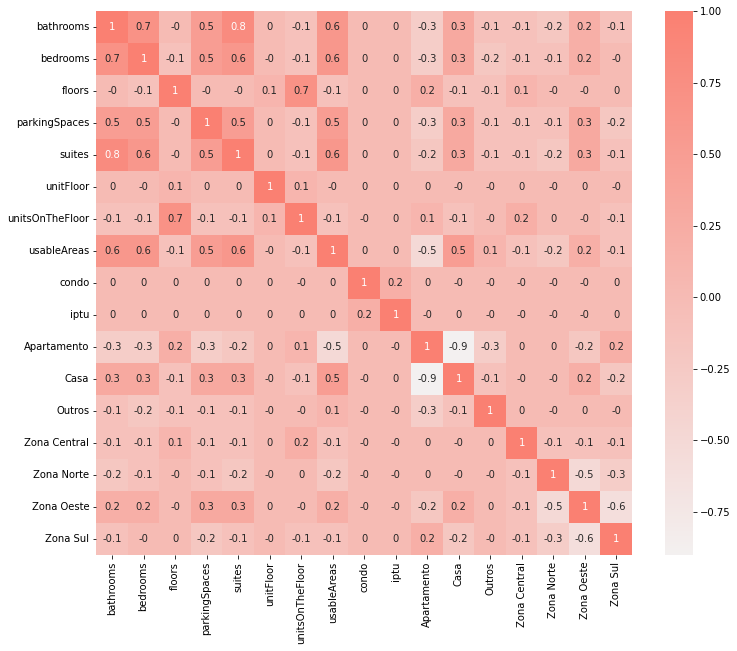

In [51]:
plt.figure(figsize=(12,10))
paleta = sns.color_palette("light:salmon",as_cmap=True)
sns.heatmap(df_cor.round(1),annot=True, cmap=paleta)

Model

In [52]:
from pyspark.ml.regression import LinearRegression

In [53]:
treino, teste = dataset_prep.randomSplit([0.7,0.3],seed=101)

In [54]:
treino.count()

48528

In [55]:
teste.count()

20911

In [56]:
model = LinearRegression().fit(treino)

In [57]:
previsoes = model.transform(treino)

In [58]:
previsoes.show()

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0|443266.04737020144|
|(17,[0,1,2,3,4,5,...|500000.0|1127455.8300462805|
|(17,[0,1,2,3,4,5,...|308615.0|111210.49949889386|
|(17,[0,1,2,3,4,5,...|279000.0|113587.95787719043|
|(17,[0,1,2,3,4,5,...|545000.0|340703.71307873435|
|(17,[0,1,2,3,4,5,...|449000.0|390571.99595798284|
|(17,[0,1,2,3,4,5,...|479000.0| 444003.4297194885|
|(17,[0,1,2,3,4,5,...|420000.0| 720022.1542161054|
|(17,[0,1,2,3,4,5,...|265000.0|519406.05037395435|
|(17,[0,1,2,3,4,5,...|490000.0| 845483.5388437647|
|(17,[0,1,2,3,4,5,...|650000.0| 644931.4982488954|
|(17,[0,1,2,3,4,5,...|379900.0| 448889.3339027724|
|(17,[0,1,2,3,4,5,...|449000.0| 714548.9501108339|
|(17,[0,1,2,3,4,5,...|190000.0| 411726.9411630478|
|(17,[0,1,2,3,4,5,...|896000.0| 597499.4601552959|
|(17,[0,1,2,3,4,5,...|679000.0| 864544.0129262989|
|(17,[0,1,2,3,4,5,...|620000.0|

Metrics

In [59]:
summary = model.summary

In [60]:
summary.r2

0.6655873678454578

In [61]:
summary.rootMeanSquaredError

810348.969531623

In [62]:
resumo = model.evaluate(teste)

In [63]:
resumo.r2

0.6585207937774393

In [64]:
resumo.rootMeanSquaredError

800525.9696828632

In [65]:
print('Linear Regression')
print("R2 treino",summary.r2,"RMSE treino",summary.rootMeanSquaredError)
print("R2 teste",resumo.r2,"RMSE teste",resumo.rootMeanSquaredError)


Linear Regression
R2 treino 0.6655873678454578 RMSE treino 810348.969531623
R2 teste 0.6585207937774393 RMSE teste 800525.9696828632


Decision Tree

In [66]:
from pyspark.ml.regression import DecisionTreeRegressor

In [67]:
modelo_tree = DecisionTreeRegressor(seed=101,maxDepth=7).fit(treino)

In [68]:
previsoes_tree = modelo_tree.transform(treino)

In [69]:
previsoes_tree.show()

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0| 340855.8044843049|
|(17,[0,1,2,3,4,5,...|500000.0| 553816.2525860447|
|(17,[0,1,2,3,4,5,...|308615.0| 340855.8044843049|
|(17,[0,1,2,3,4,5,...|279000.0| 340855.8044843049|
|(17,[0,1,2,3,4,5,...|545000.0|     445137.460625|
|(17,[0,1,2,3,4,5,...|449000.0| 553816.2525860447|
|(17,[0,1,2,3,4,5,...|479000.0|     445137.460625|
|(17,[0,1,2,3,4,5,...|420000.0| 553816.2525860447|
|(17,[0,1,2,3,4,5,...|265000.0| 553816.2525860447|
|(17,[0,1,2,3,4,5,...|490000.0|  820272.937751004|
|(17,[0,1,2,3,4,5,...|650000.0|  736254.943802521|
|(17,[0,1,2,3,4,5,...|379900.0|     445137.460625|
|(17,[0,1,2,3,4,5,...|449000.0|     445137.460625|
|(17,[0,1,2,3,4,5,...|190000.0| 340855.8044843049|
|(17,[0,1,2,3,4,5,...|896000.0| 553816.2525860447|
|(17,[0,1,2,3,4,5,...|679000.0|1158420.7653661144|
|(17,[0,1,2,3,4,5,...|620000.0|

In [70]:
from pyspark.ml.evaluation import RegressionEvaluator

In [71]:
teste_tree = modelo_tree.transform(teste)
evaluator = RegressionEvaluator()

In [72]:
r2_treino_tree = evaluator.evaluate(previsoes_tree,{evaluator.metricName:"r2"})
rsme_treino_tree = evaluator.evaluate(previsoes_tree,{evaluator.metricName:"rmse"})
r2_teste_tree = evaluator.evaluate(teste_tree,{evaluator.metricName:"r2"})
rsme_teste_tree = evaluator.evaluate(teste_tree,{evaluator.metricName:"rmse"})

In [73]:
print('Decision Tree')
print("R2 treino",r2_treino_tree,"RMSE treino",rsme_treino_tree)
print("R2 treino",r2_teste_tree,"RMSE treino",rsme_teste_tree)

Decision Tree
R2 treino 0.7930752588471226 RMSE treino 637436.5434260432
R2 treino 0.7738133838892687 RMSE treino 651518.489920883


Random Forest

In [74]:
from pyspark.ml.regression import RandomForestRegressor

In [75]:
modelo_rf = RandomForestRegressor(seed=101,maxDepth=7,numTrees=10).fit(treino)

In [76]:
previsao_rf = modelo_rf.transform(treino)

In [77]:
previsao_rf.show()

+--------------------+--------+------------------+
|            features|   label|        prediction|
+--------------------+--------+------------------+
|(17,[0,1,2,3,4,5,...|260000.0|390218.33742322924|
|(17,[0,1,2,3,4,5,...|500000.0| 510060.6595782173|
|(17,[0,1,2,3,4,5,...|308615.0|360766.74127901345|
|(17,[0,1,2,3,4,5,...|279000.0|360766.74127901345|
|(17,[0,1,2,3,4,5,...|545000.0|  396904.928725379|
|(17,[0,1,2,3,4,5,...|449000.0|  492913.652312712|
|(17,[0,1,2,3,4,5,...|479000.0|433807.13396085694|
|(17,[0,1,2,3,4,5,...|420000.0| 664440.4325776277|
|(17,[0,1,2,3,4,5,...|265000.0|479615.50733929937|
|(17,[0,1,2,3,4,5,...|490000.0| 816123.0337632223|
|(17,[0,1,2,3,4,5,...|650000.0| 640247.1517314625|
|(17,[0,1,2,3,4,5,...|379900.0|403131.21721626434|
|(17,[0,1,2,3,4,5,...|449000.0|403131.21721626434|
|(17,[0,1,2,3,4,5,...|190000.0| 356904.3339549792|
|(17,[0,1,2,3,4,5,...|896000.0| 547828.3209496561|
|(17,[0,1,2,3,4,5,...|679000.0| 893791.6624292185|
|(17,[0,1,2,3,4,5,...|620000.0|

In [78]:
teste_rf = modelo_rf.transform(teste)

In [79]:
r2_treino_rf = evaluator.evaluate(previsao_rf,{evaluator.metricName:"r2"})
rsme_treino_rf = evaluator.evaluate(previsao_rf,{evaluator.metricName:"rmse"})
r2_teste_rf = evaluator.evaluate(teste_rf,{evaluator.metricName:"r2"})
rsme_teste_rf = evaluator.evaluate(teste_rf,{evaluator.metricName:"rmse"})

In [80]:
print('Random Forest')
print("R2 treino",r2_treino_rf,"RMSE treino",rsme_treino_rf)
print("R2 teste",r2_teste_rf,"RMSE teste",rsme_teste_rf)

Random Forest
R2 treino 0.8017561510914318 RMSE treino 623922.4426224458
R2 teste 0.7905295233620376 RMSE teste 626981.4677383784


In [81]:
print('Linear Regression')
print("R2",resumo.r2,"RMSE",resumo.rootMeanSquaredError)
print('Decision Tree')
print("R2",r2_teste_tree,"RMSE",rsme_teste_tree)
print('Random Forest')
print("R2",r2_teste_rf,"RMSE",rsme_teste_rf)

Linear Regression
R2 0.6585207937774393 RMSE 800525.9696828632
Decision Tree
R2 0.7738133838892687 RMSE 651518.489920883
Random Forest
R2 0.7905295233620376 RMSE 626981.4677383784


Cross Validation

In [82]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [83]:
lr = LinearRegression()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()
evaluator = RegressionEvaluator()

In [84]:
grid_lr = (ParamGridBuilder()
    .build()
)

In [85]:
grid_dr = (ParamGridBuilder()
    .addGrid(dr.maxDepth, [2,5,10])
    .addGrid(dr.maxBins,[10,32,45])
    .build()
)

In [98]:
grid_rr = (ParamGridBuilder()
    .addGrid(rr.numTrees, [10,20,30])
    .addGrid(rr.maxDepth, [5,10])
    .addGrid(rr.maxBins,[10,32,45])
    .build()
)

In [87]:
cv_lr = (CrossValidator(estimator=lr, estimatorParamMaps=grid_lr, evaluator=evaluator, numFolds=3, seed=101)
)

In [88]:
cv_dr = (CrossValidator(estimator=dr, estimatorParamMaps=grid_dr, evaluator=evaluator, numFolds=3, seed=101)
)

In [99]:
cv_rr = (CrossValidator(estimator=rr, estimatorParamMaps=grid_rr, evaluator=evaluator, numFolds=3, seed=101)
)

In [90]:
modelo_lr = cv_lr.fit(treino)

In [91]:
modelo_dr = cv_dr.fit(treino)

In [100]:
modelo_rr = cv_rr.fit(treino)

In [93]:
previsoes_lr = modelo_lr.transform(teste)

In [94]:
previsoes_dr = modelo_dr.transform(teste)

In [101]:
previsoes_rr = modelo_rr.transform(teste)

In [102]:
r2_lr = evaluator.evaluate(previsoes_lr,{evaluator.metricName:"r2"})
rsme_lr = evaluator.evaluate(previsoes_lr,{evaluator.metricName:"rmse"})
r2_dr = evaluator.evaluate(previsoes_dr,{evaluator.metricName:"r2"})
rsme_dr = evaluator.evaluate(previsoes_dr,{evaluator.metricName:"rmse"})
r2_rr = evaluator.evaluate(previsoes_rr,{evaluator.metricName:"r2"})
rsme_rr = evaluator.evaluate(previsoes_rr,{evaluator.metricName:"rmse"})

In [103]:
print('Linear Regression')
print("R2",resumo.r2,"RMSE",resumo.rootMeanSquaredError)
print('Linear Regression CV')
print("R2",r2_lr,"RMSE",rsme_lr)
print('Decision Tree')
print("R2",r2_teste_tree,"RMSE",rsme_teste_tree)
print('Decision Tree CV')
print("R2",r2_dr,"RMSE",rsme_dr)
print('Random Forest')
print("R2",r2_teste_rf,"RMSE",rsme_teste_rf)
print('Random Forest CV')
print("R2",r2_rr,"RMSE",rsme_rr)



Linear Regression
R2 0.6585207937774393 RMSE 800525.9696828632
Linear Regression CV
R2 0.6585207937774393 RMSE 800525.9696828632
Decision Tree
R2 0.7738133838892687 RMSE 651518.489920883
Decision Tree CV
R2 0.7946390982454046 RMSE 620800.6672872682
Random Forest
R2 0.7905295233620376 RMSE 626981.4677383784
Random Forest CV
R2 0.8310426928452984 RMSE 563095.1455243452


Teste

In [109]:
X

['bathrooms',
 'bedrooms',
 'floors',
 'parkingSpaces',
 'suites',
 'unitFloor',
 'unitsOnTheFloor',
 'usableAreas',
 'condo',
 'iptu',
 'Apartamento',
 'Casa',
 'Outros',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [116]:
novo_imovel =[
    {
        'bathrooms':2,
        'bedrooms':2,
        'floors':1,
        'parkingSpaces':2,
        'suites':0,
        'unitFloor':0,
        'unitsOnTheFloor':0,
        'usableAreas':146,
        'condo':0,
        'iptu':650,
        'Apartamento':0,
        'Casa':1,
        'Outros':0,
        'Zona Central':1,
        'Zona Norte':0,
        'Zona Oeste':0,
        'Zona Sul':0,
        'label': 0
    }
]

In [117]:
meu_imovel = spark.createDataFrame(novo_imovel)

In [118]:
assembler = VectorAssembler(inputCols=X,outputCol='features')

In [119]:
vect_home = assembler.transform(meu_imovel).select('features','label')

In [120]:
modelo_rr.transform(vect_home).show()

+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|(17,[0,1,2,3,7,9,...|    0|622076.9830354757|
+--------------------+-----+-----------------+

